# Mushrooms: Can I Eat This?

## Project Topic
### Topic Summary

Humans love to explore, and that includes the landscapes of both land and flavor. It doesn't take long while exploring a woods to stumble upon a mushroom. But should you eat it? Some mushrooms are delicious, others are deadly, and how is en explorer to know? 

This project is a classification task that will classify mushrooms as either edible or poisonous based on various features of the mushrooms. We will implement algorithms such as logistic regression, ridge regression, lasso regression, decision tree, random forest, xgboost, support vector classifier, and multi-layer perceptrom to classify mushrooms. 


### Goals

The goal of this project is to successfully train several ML models that can classify mushrooms as either edible or poisonous. My personal goal is to experiment with different types of ML models and learn their relative strengths, weaknesses, and some best practices in implementing them. 


## Data

### Data Source

The data source is the mushrooms dataset provided by the University of California at Irvine Machine Learning Repository. It includes observations of individual mushrooms, with values for various features of the mushrooms. 

Citation: 
UCI Machine Learning Repository. (n.d.). Mushroom Data Set. University of California, Irvine. Retrieved March 14, 2025, from https://archive.ics.uci.edu/dataset/73/mushroom


### Data Description

The Mushrooms data set is a tabular data set with 8,124 instances and 22 features, and the data file is 365.9 KB. The data is in a single table, but the table lacks column headers, so those will have to be added. Each instance is a specific mushroom and the response variable is whether or not the mushroom is edible or poisonous. The features describe various aspects of the individual mushrooms. All features are categorical. The feature list below comes from the documentation of the Mushrooms data set and it includes the values for each feature, as well as a translation for each value from the abbreviation to its full meaning.


Attribute Information: (classes: edible=e, poisonous=p)

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


### Data Cleaning

The data will need some cleaning before it is usable for training.

First, I add column headers so that the columns can be referenced in the training, and also so that the results are interpretable.

Second, I replace the single-letter abbreviations for each category value with the full word. This is so that the results are human-readible. 

Third, I drop two columns for opposite reasons. I drop veil-type because there is only one value for that field in the data set, so it adds no information. Next, I drop odor because it perfectly discriminates between the response variables, rendering all the other variables unneeded. Because my goal is to experiment with different model types, I don't want to include this. There is also a real-world application for dropping the variable, as odor is subjective and different people may report different odors, so I wouldn't want the model to be solely dependent on this somewhat subjective variable. 

Fourth, I make the categorical variables usable for the models, so I will implement one-hot encoding to replace each categorical variable with a set of Boolean variables. I will need to do this twice for the two different model types I plan to deploy. The linear models (logistic regression, ridge regression, and lasso regression) require dropping one category from each variable to avoid collinearity. The nonlinear models (decision tree, random forest, xgboost, etc.) do not have this same issue, so I will have one column for each feature value.


### Exploratory Data Analysis and Data Discussion

In the notebook below, you will see where I implemented the above strategies. In addition, you can see visualizations I used to analyze the features before I began training. The first is a set of stacked bar charts for each feature, where the proportion of edible vs. poisonous within each feature category is indicated by color. Creating these visuals led me to realize that the veil-type feature adds no information and the odor feature adds perfect information. 

The second visualization to look for is a categorical association matrix (similar to a correlation plot, but appropriate for categorical data) which uses Cramér’s V to calculate the relationship between features. This was mostly to see which features are most closely related and to look for interesting trends. This plot reinforced the need to drop veil-type and odor: Veil-type has no variation and odor almost perfectly predicts the response. 


## Models

### Models listed by type
Models used for this project

| Model Type  | Model Name                     |
|------------|--------------------------------|
| **Linear Models** | Logistic Regression        |
|            | Ridge Regression           |
|            | Lasso Regression  |
| **Non-Linear Models** | Support Vector Classifier (SVC) |
|            | Decision Tree Classifier  |
|            | Random Forest Classifier  |
|            | XGBoost Classifier        |
|            | Multi-Layer Perceptron (MLP) |

### Model considerations

**Handling Colinearity**
Because linear models are impacted by colinearity in a way that nonlinear models are not, I used onehot encoding differently for the two model types. For the linear models, I dropped one one-hot encoding colunmn from each feature, whereas for the nonlinear models, I did not need to drop a column in the one hot encoding.

**Increasing Rigor**
When I initially trained the linear models, they performed perfectly, and this was even after dropping the odor feature. Because I wanted to train models in a more realistic scenario, I increased rigor by dropping several highly predictive features before I retrained the linear models and then trained the nonlinear models.

**Hyperparameter Tuning**
I decided to implement grid search for hyperparameter tuning on any models that did not perform adequately using the default hyperparameter values. It turned out that all models besides the lasso performed quite well without tuning, so I focused my tuning efforts on the lasso model. Before tuning, the lasso was entirely ineffective, scoring the minimum possible AUC of 0.5. The scikitlearn implementation of lasso regression uses an alpha of 1 as the default. After hyperparameter tuning, I found that the optimal value for alpha was 0.0001, and retraining using this value led to an AUC of 0.98.

**Balanced Data**
The Mushrooms data set is already quite balanced between the two classes, so I did not further balance. However, if there had been a significant difference in the count between the edible and poisonous observations, I would have used either sampling to reduce the count of the larger group, or, if the smaller group was very small, I might have used bootstrapping to increase the size of the smaller group. 


## Results and Analysis

The results of this project were highly successful. I ended up with all models performing with AUC well above 0.95, even after dropping several of the most highly predictive features. The visualizations below show both the ROC curves for each classifier, as well as the coefficient values for the logistic regression to get a sense of which features were most predictive. 

I calcualated several evaluation metrics for each model, and I primarily focused on the ROC curves and AUC as this is the most comprehensive evaluation metric for a classification model. All the models performed well overall as judged by the variety of evaluation metrics I used.

## Discussion and Conclusion

**What I learned**
This project was super helpful in my development as a machine learning practitioner. The major learning for me was on how to work with exclusively categorical data. I have trained models in the past, both for other courses and also for my work, but they have always included some sort of numerical component. In these cases, I have been able to use correlation plots to look for linearity among features. This project pushed me because all the features were categorical. As a result, I had to learn about Cramér’s V, which allows you to build a similar function to a correlation plot but for categorical data. This was new to me, and I'm glad to add this new tool to my toolbox.

**Improving Performance**
I was initially surprised by the poor performance of the lasso model, but after hyperparameter tuning, it became clear why it initially did so poorly. The default value for the alpha hyperparameter in scikitlearn is 1, but after using grid search for hyperparameter tuning, I found the optimal value of alpha for this data set was 0.0001. This is a dramatically different value from the default, so in retrospect, it makes sense that the pre-tuning lasso model performed so ineffectively.

**Extending the Project**
If I were to expand this project further, I might try training models on random samples of features. In this process, I found that the features together were highly predictive to the point of not needing more complex models, so I decided to drop several features. In future iterations, I could build this into my model training by training models on randomly selected subsets of features and seeing how they performed. 

Another natural extension of this project would be to create a phone app where a person could enter the values to determine whether a mushroom is edible. I would be hesitant to build this, however, as I am no mushroom expert, and if the app creates an error, it could lead to the illness or even death of a user. Some day, I hope to turn a model into an app, but this doesn't seem to be the right scenario to do this safely. 


In [207]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV



In [208]:
# Get data (data source: https://archive.ics.uci.edu/dataset/73/mushroom)
filepath = 'course_1_final_project/mushroom/agaricus-lepiota.data'
df = pd.read_csv(filepath)

In [209]:
names_filepath = 'course_1_final_project/mushroom/agaricus-lepiota.names'

with open(names_filepath, "r") as file:
    content = file.read()

print(content)


1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [210]:
# Add the column names
column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
                "gill-attachment", "gill-spacing", "gill-size", "gill-color",
                "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                "stalk-surface-below-ring", "stalk-color-above-ring",
                "stalk-color-below-ring", "veil-type", "veil-color",
                "ring-number", "ring-type", "spore-print-color",
                "population", "habitat"]

df.columns = column_names


In [211]:
# check for balance
df['class'].value_counts()

e    4208
p    3915
Name: class, dtype: int64

In [212]:
# each field uses single letters for the values. For human readibility, replace all letters with the words they stand for

mappings = {
    "class": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink",
                  "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty",
             "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green",
                   "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "unknown"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink",
                               "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink",
                               "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large",
                  "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange",
                          "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered",
                   "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths",
                "u": "urban", "w": "waste", "d": "woods"}
}

df.replace(mappings, inplace=True)


In [213]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8119,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8120,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8121,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


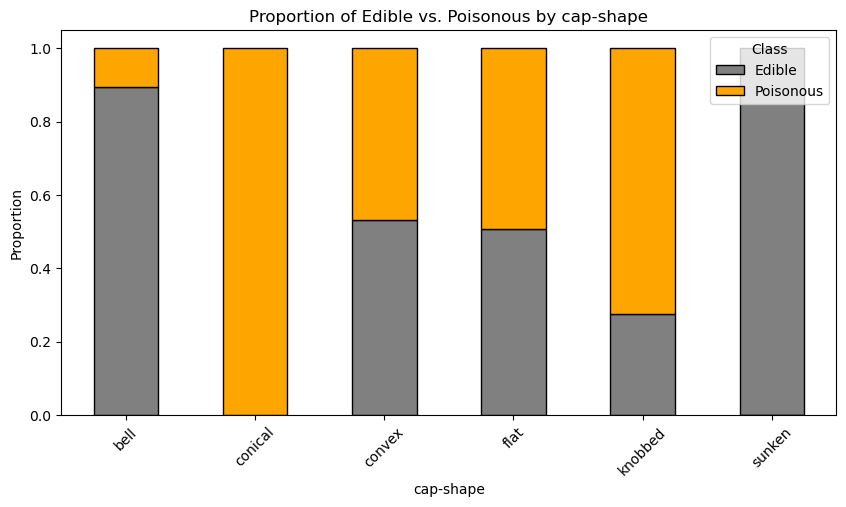

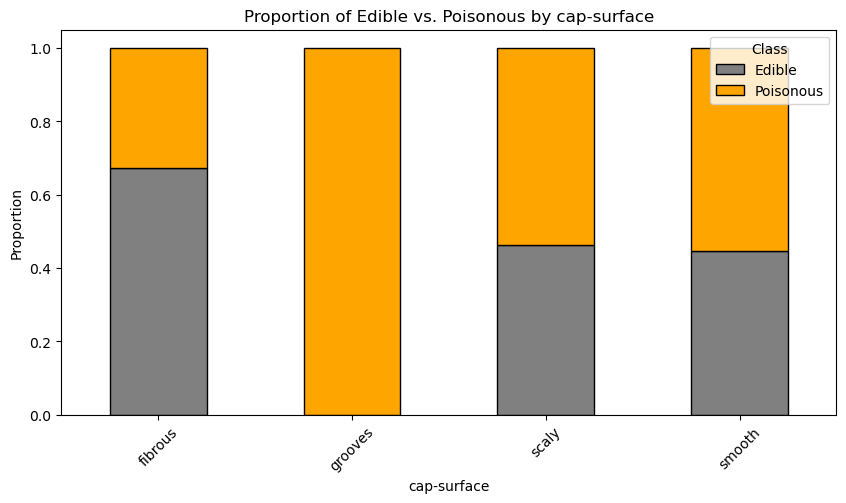

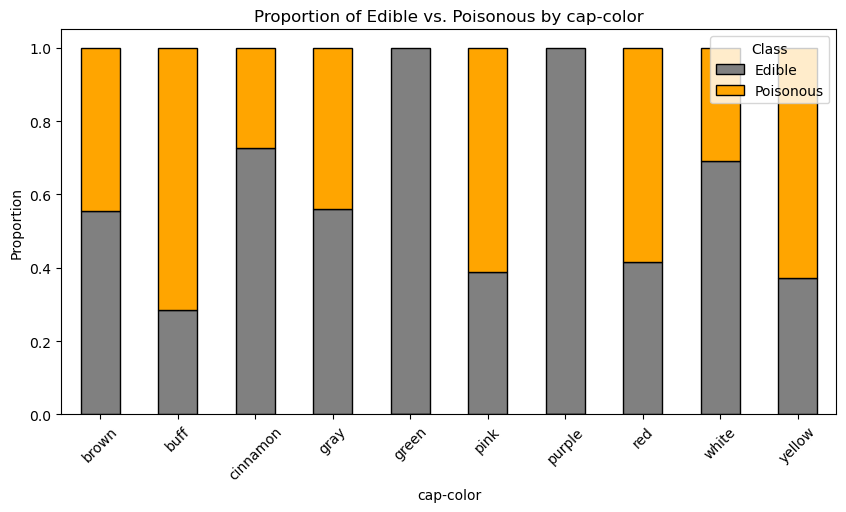

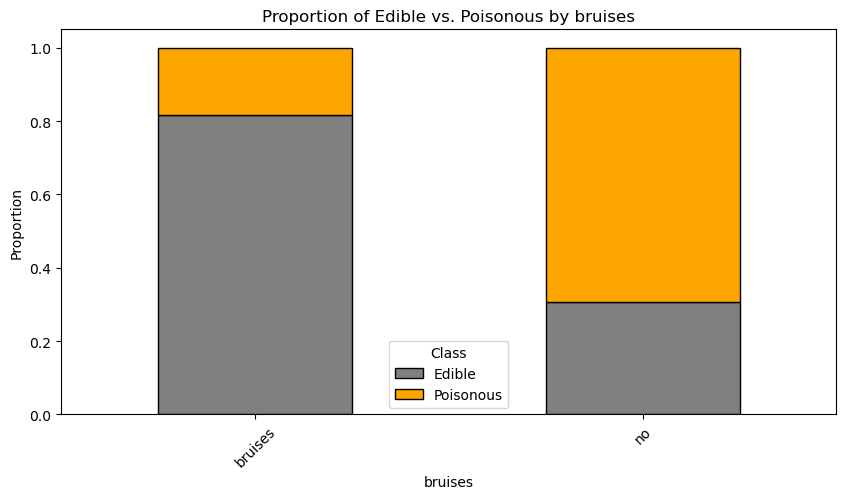

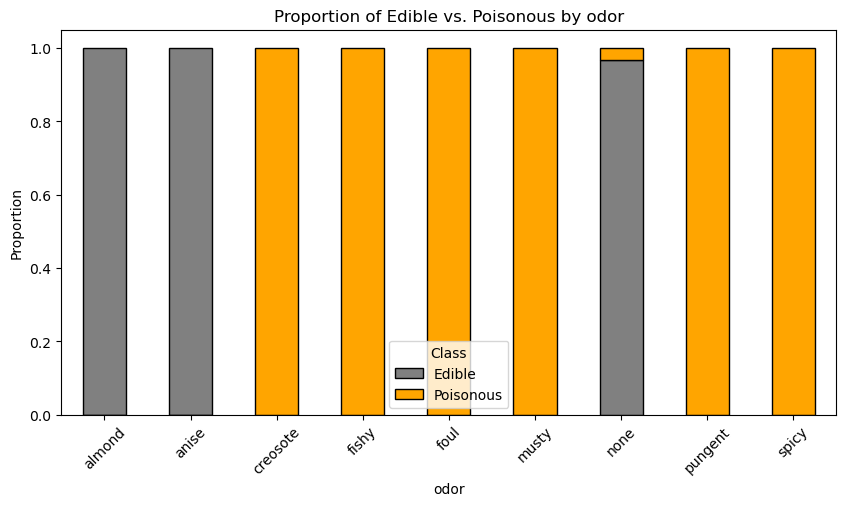

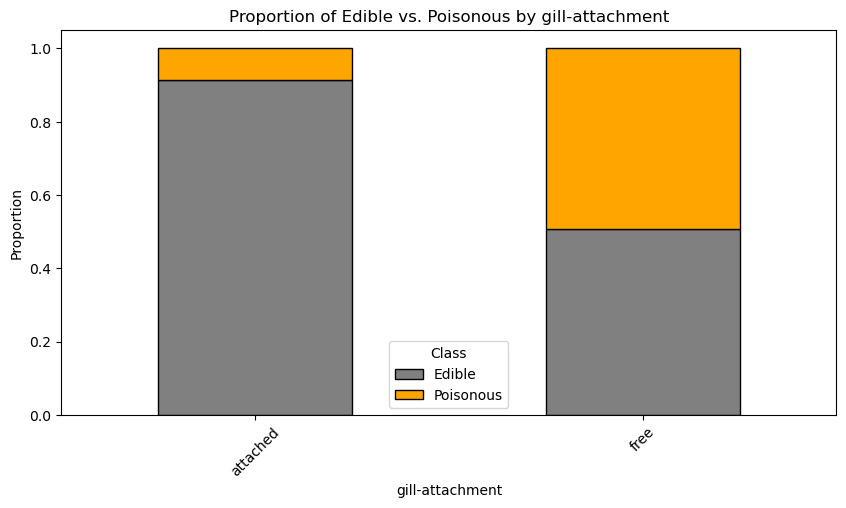

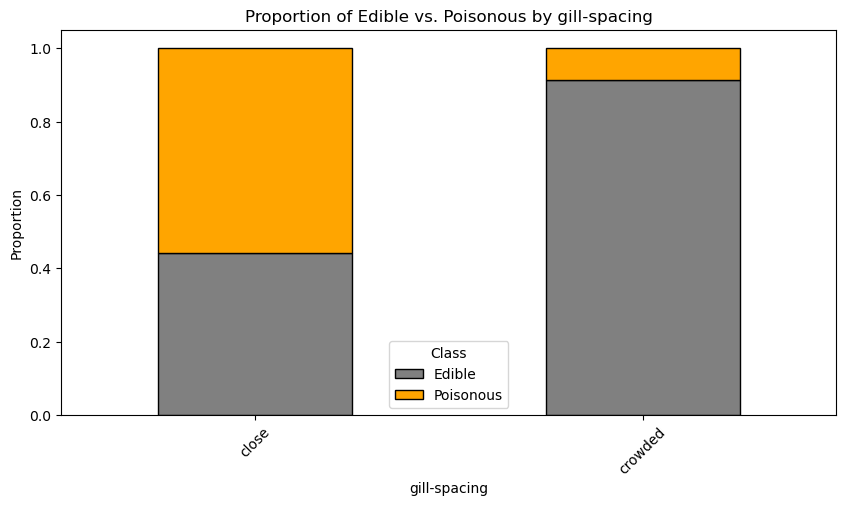

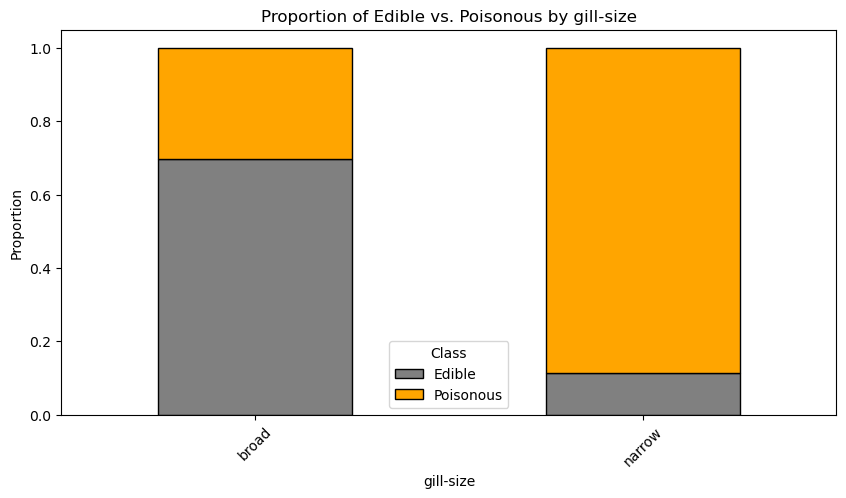

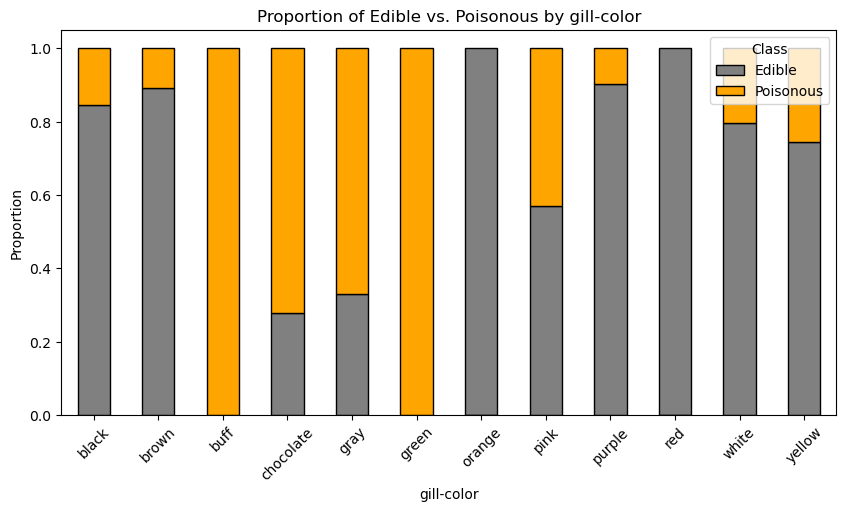

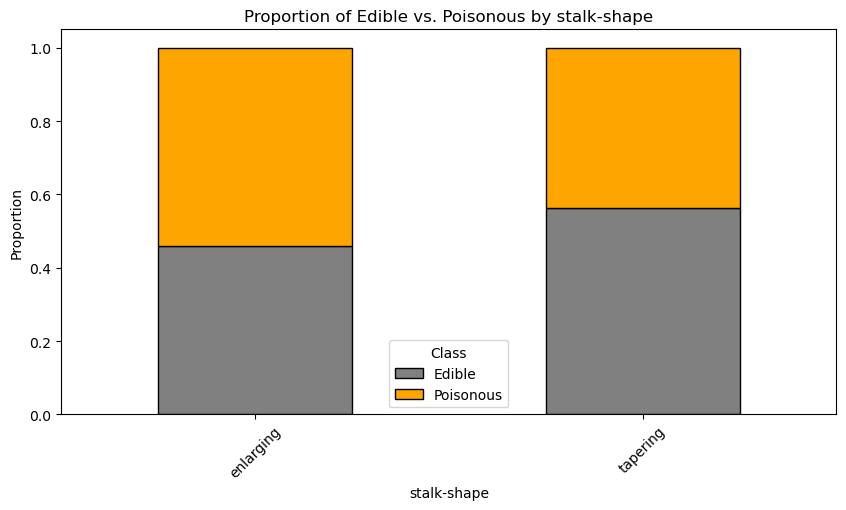

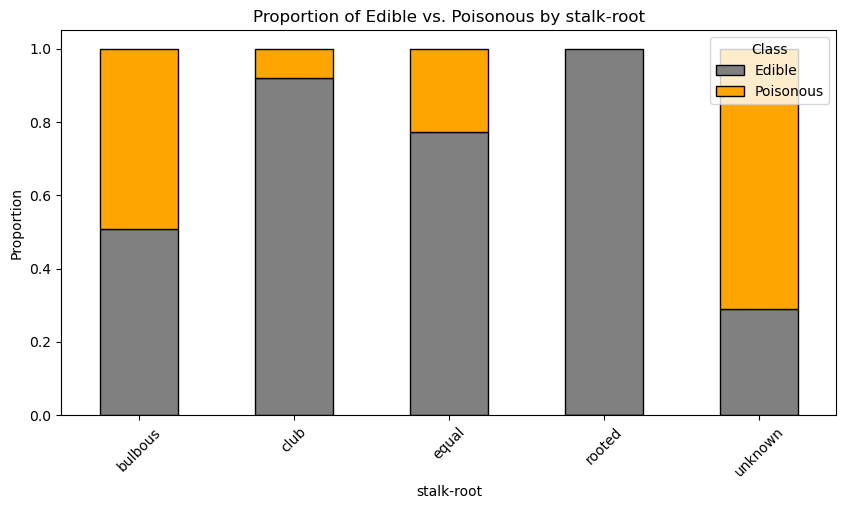

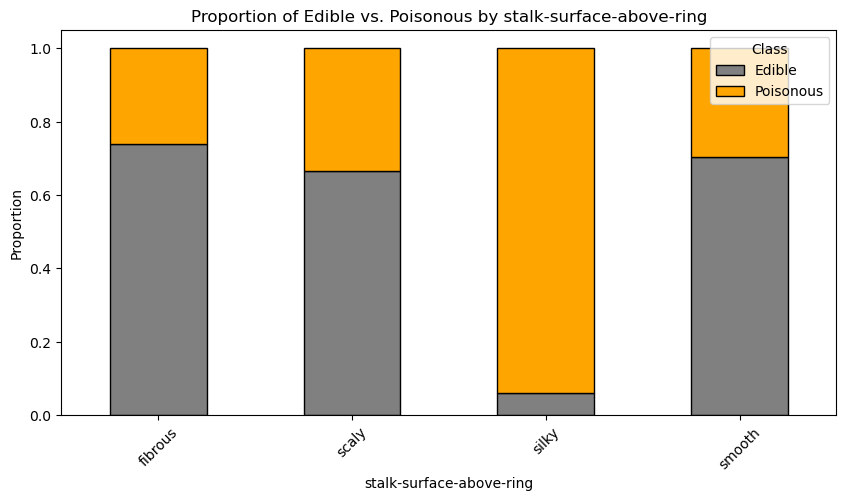

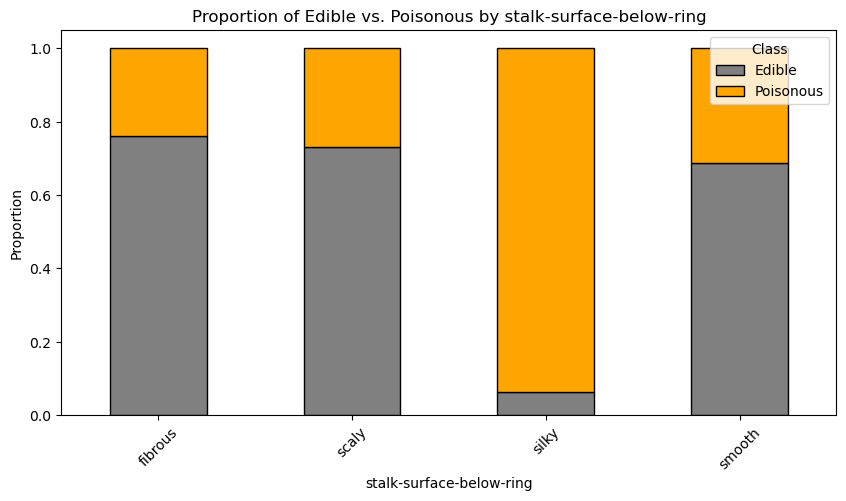

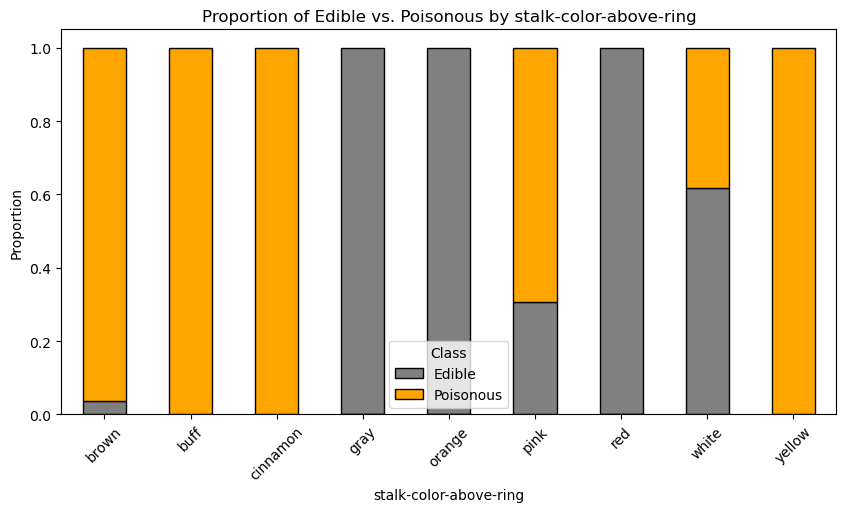

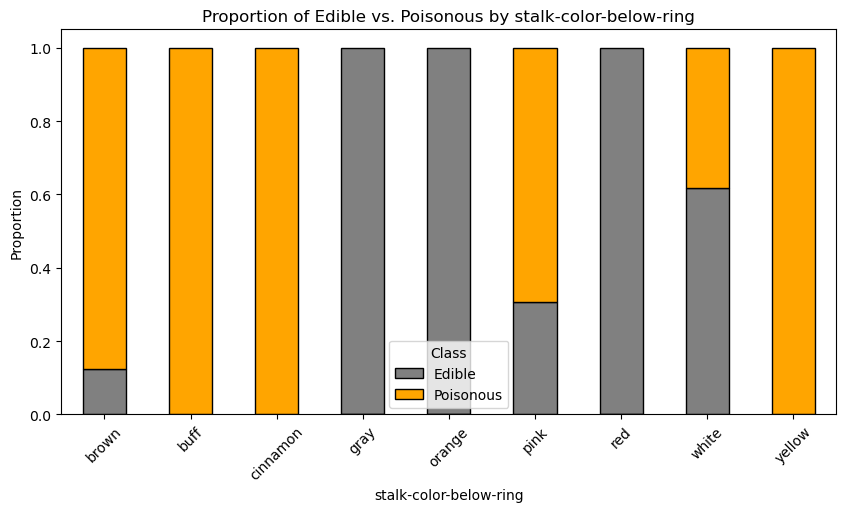

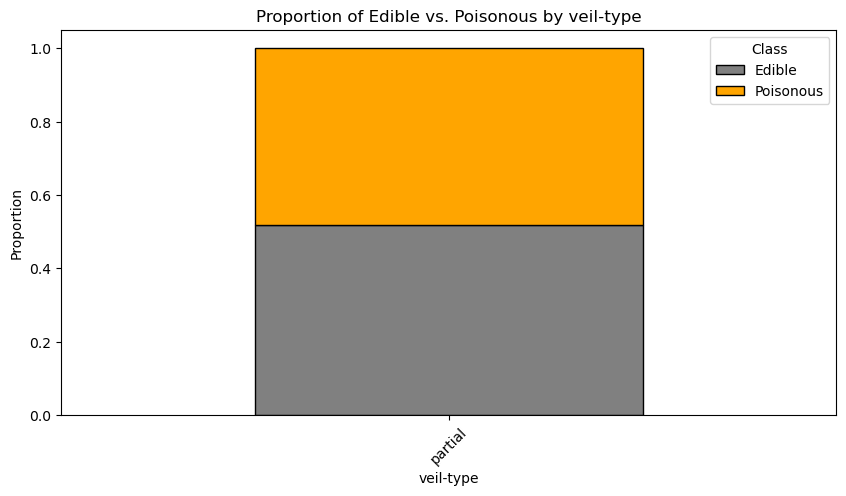

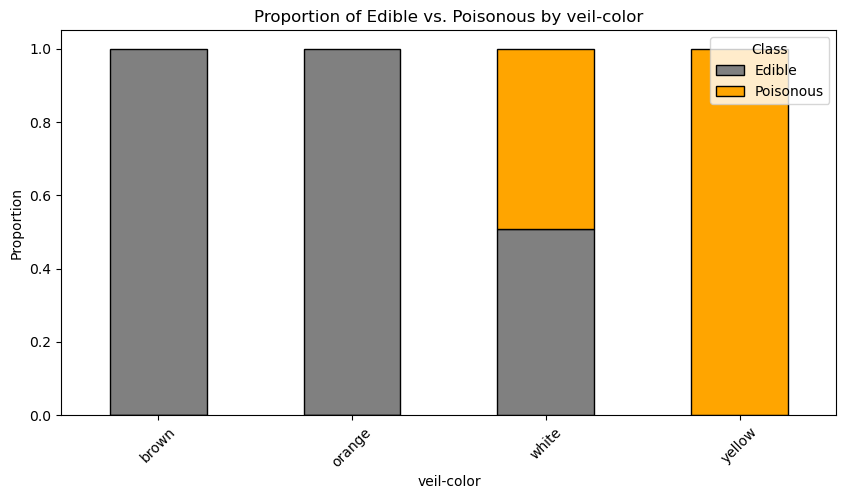

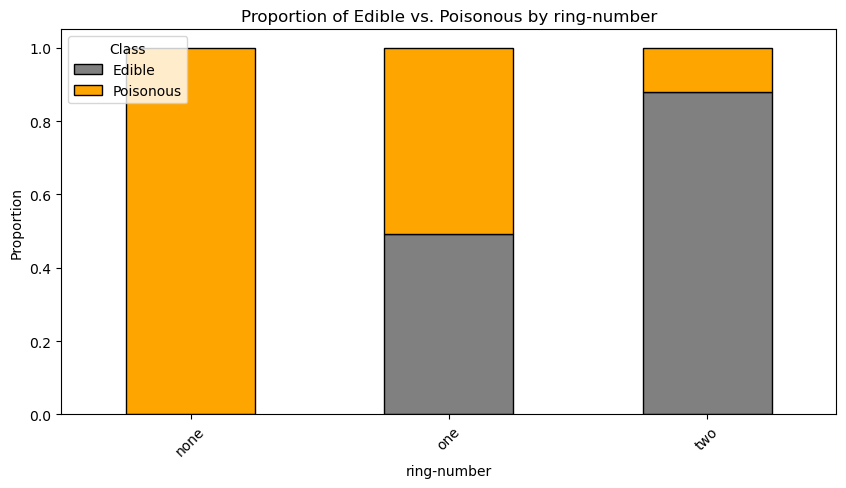

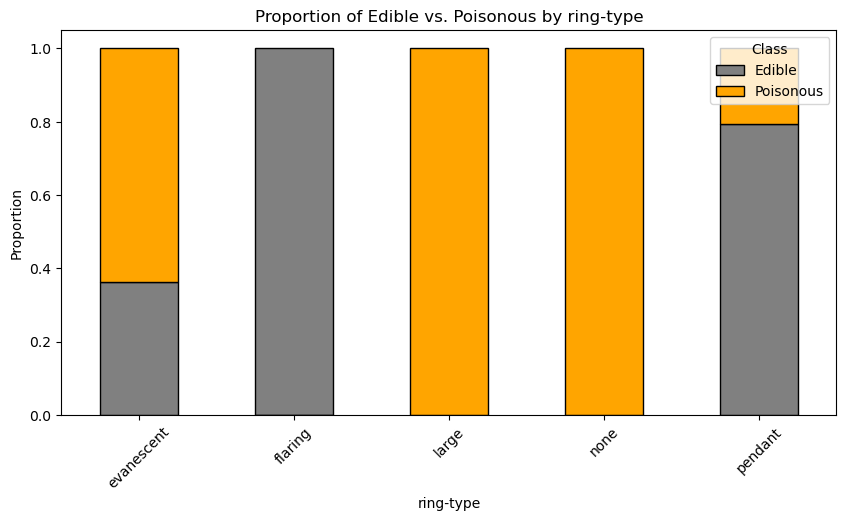

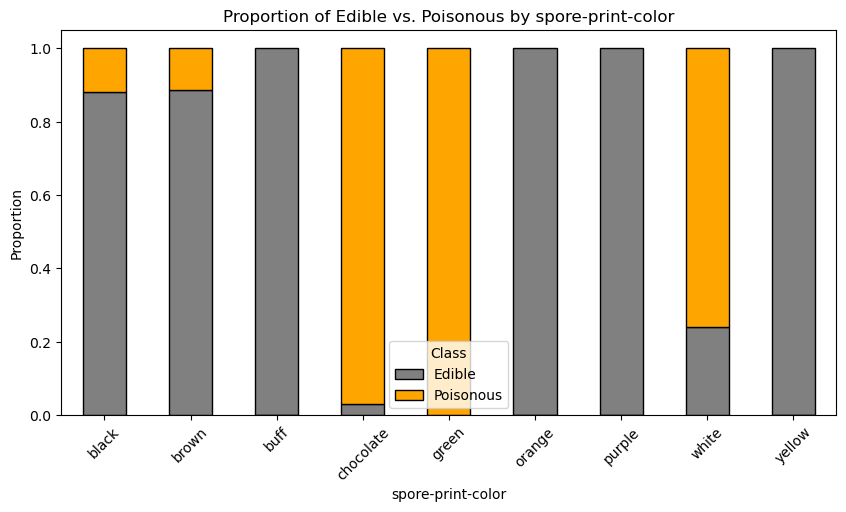

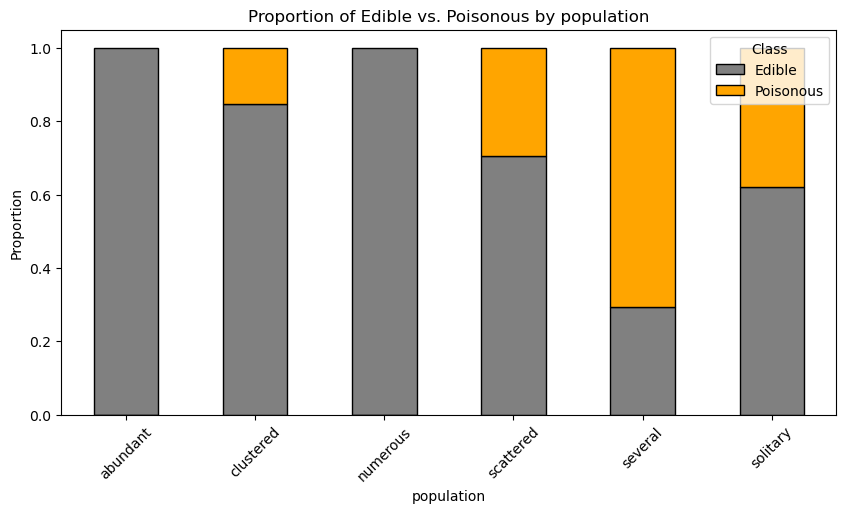

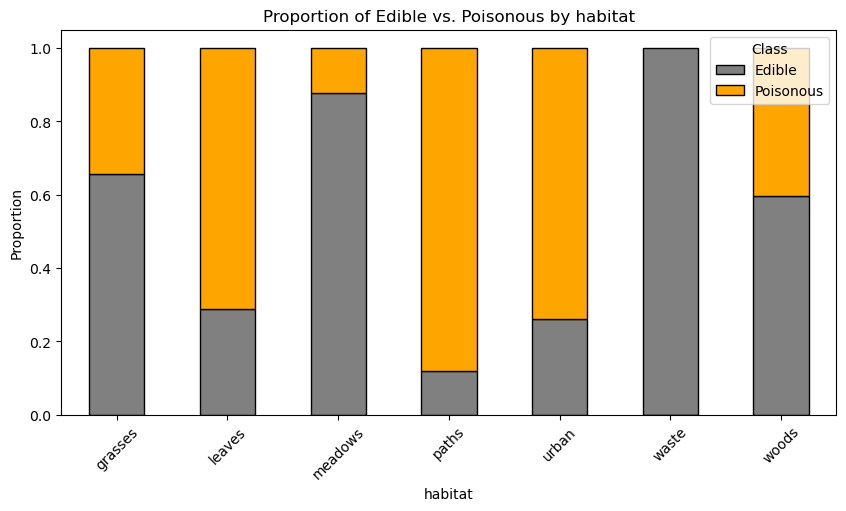

In [214]:
# Create stacked bar charts showing the relationship of features to the response variable 
custom_colors = {"edible": "gray", "poisonous": "orange"}

for column in df.columns[1:]:  # Skip "class" column
    prop_table = df.groupby(column)["class"].value_counts(normalize=True).unstack()

    prop_table.plot(kind="bar", stacked=True, figsize=(10, 5), color=[custom_colors["edible"], custom_colors["poisonous"]], edgecolor="black")

    plt.title(f"Proportion of Edible vs. Poisonous by {column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.legend(title="Class", labels=["Edible", "Poisonous"])
    plt.xticks(rotation=45)
    
    plt.show()

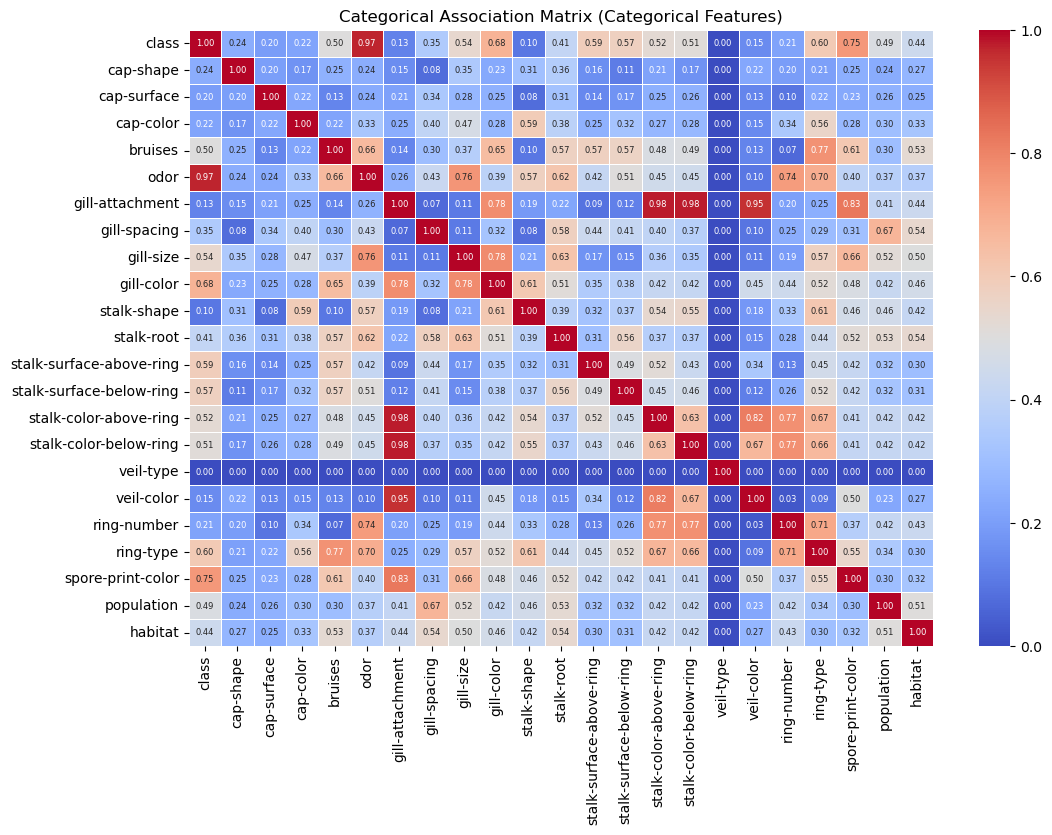

In [215]:
# Analyze relationships between features using Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    denominator = min((kcorr-1), (rcorr-1))
    return np.sqrt(phi2corr / max(denominator, 1e-8)) 

def cramers_v_matrix(df):
    cat_columns = df.columns
    cramers_results = pd.DataFrame(index=cat_columns, columns=cat_columns)

    for col1 in cat_columns:
        for col2 in cat_columns:
            if col1 == col2:
                cramers_results.loc[col1, col2] = 1.0
            else:
                cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    return cramers_results.astype(float)

cramers_matrix = cramers_v_matrix(df)

plt.figure(figsize=(12, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,annot_kws={"size": 6})
plt.title("Categorical Association Matrix (Categorical Features)")
plt.show()

In [216]:
# The veil-type feature only has one value, so drop that feature. Odor predicts the response almost perfectly, so drop that as well.
df = df.drop(columns=["veil-type","odor"], errors="ignore")

In [217]:
# apply one hot encoding separately for linear and nonlinear models

y = df['class']  
X = df.drop(columns=['class'])

ohe_linear = OneHotEncoder(drop='first', sparse=False)
X_linear = pd.DataFrame(ohe_linear.fit_transform(X), columns=ohe_linear.get_feature_names_out())

ohe_nonlinear = OneHotEncoder(sparse=False)
X_nonlinear = pd.DataFrame(ohe_nonlinear.fit_transform(X), columns=ohe_nonlinear.get_feature_names_out())

y = y.map({'edible': 0, 'poisonous': 1}) 


In [218]:
# Split into train and test sets
X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, _, _ = train_test_split(X_nonlinear, y, test_size=0.2, random_state=42)


In [ ]:
# checking for nulls in the y values
y_train_nulls = y_train.isnull().sum()
y_test_nulls = y_test.isnull().sum()
print(f'Null values in y_train: {y_train_nulls}')
print(f'Null values in y_test: {y_test_nulls}')

Null values in y_train: 0
Null values in y_test: 0


In [220]:
# Train linear models (Logistic Regression, Ridge, Lasso)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
ridge = RidgeClassifier()
lasso = Lasso()

log_reg.fit(X_train_linear, y_train)
ridge.fit(X_train_linear, y_train)
lasso.fit(X_train_linear, y_train)

y_pred_log_reg = log_reg.predict(X_test_linear)
y_pred_ridge = ridge.predict(X_test_linear)
y_pred_lasso = lasso.predict(X_test_linear).round().astype(int) 

def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression'))
results.append(evaluate_model(y_test, y_pred_ridge, 'Ridge Regression'))
results.append(evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'))

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.995692   0.993548  0.997409  0.995475
1     Ridge Regression  1.000000   1.000000  1.000000  1.000000
2     Lasso Regression  0.524923   0.000000  0.000000  0.000000


/Users/justinalt/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


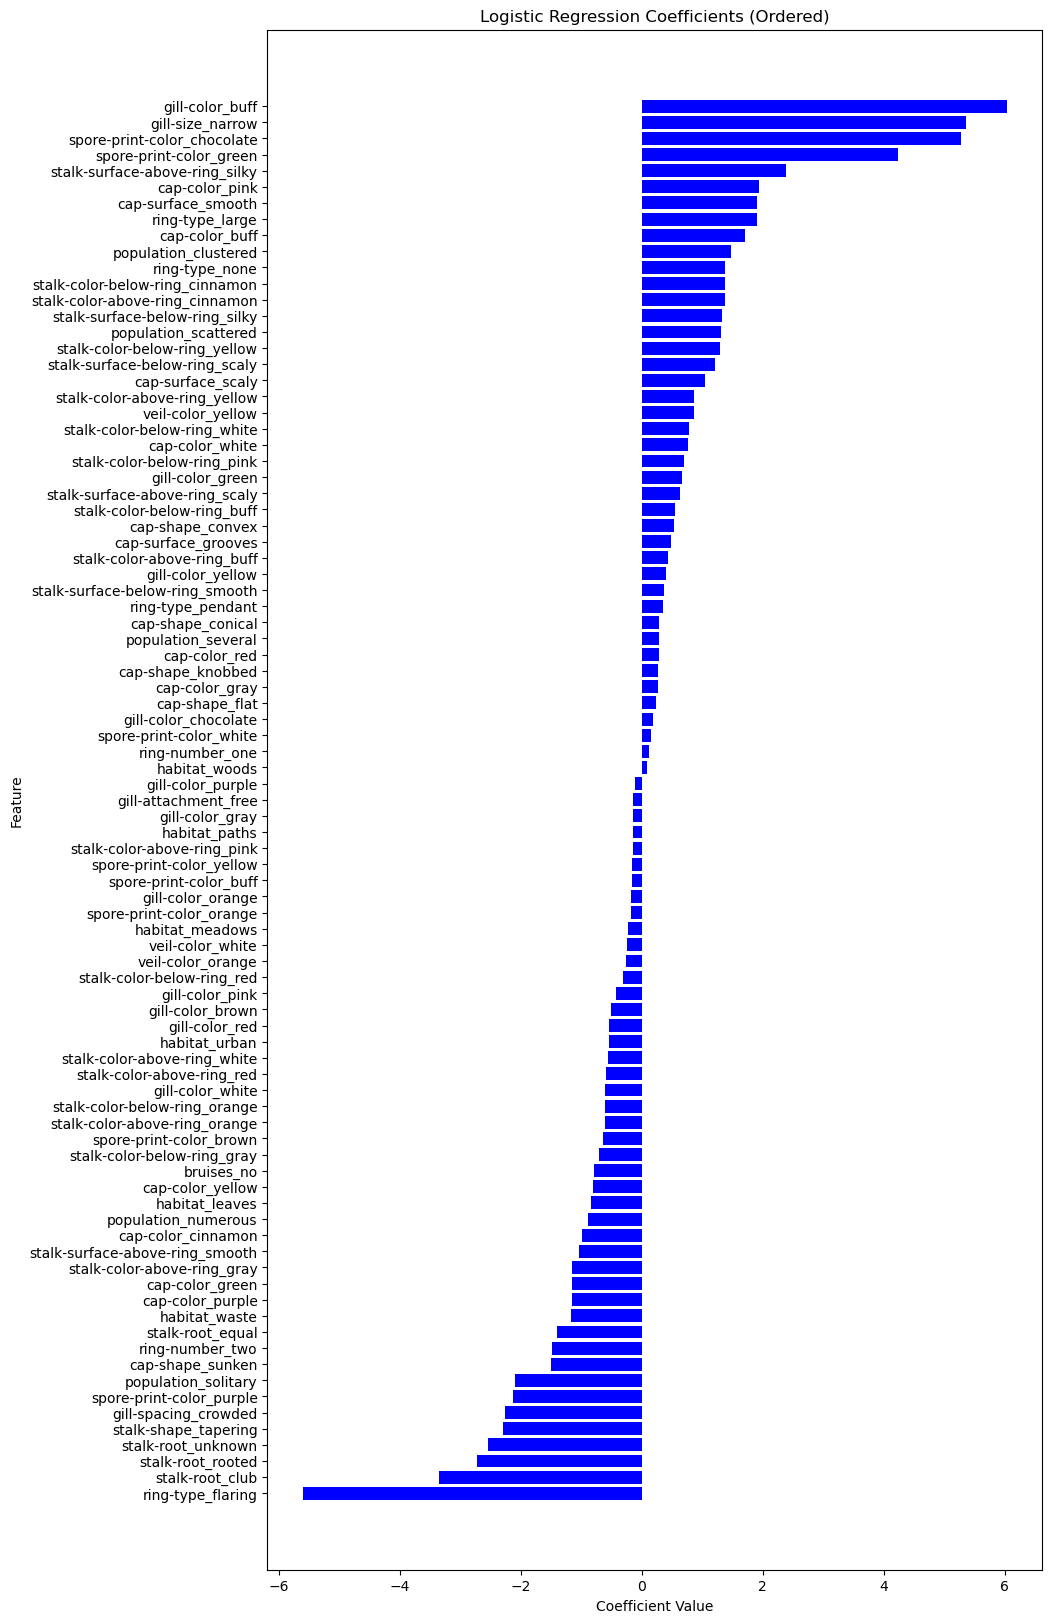

In [221]:
# Plot logistic regression coefficients ordered by size
import matplotlib.pyplot as plt
import numpy as np

coefficients = log_reg.coef_.flatten()
feature_names = X_train_linear.columns

sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients (Ordered)')
plt.show()

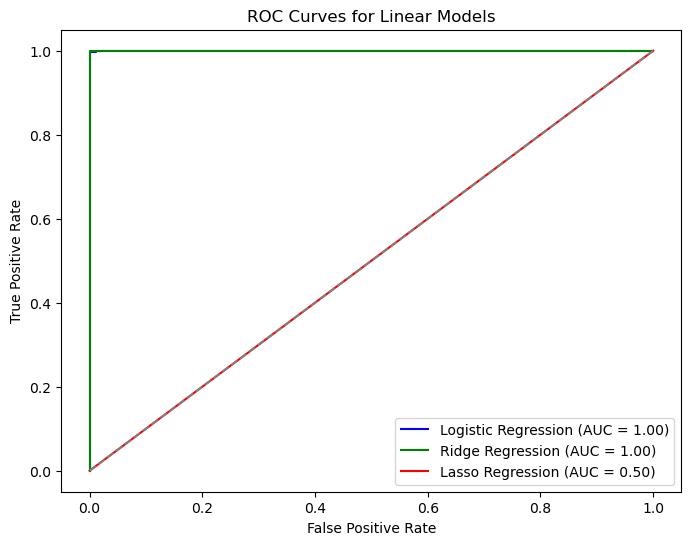

In [222]:
# Plot ROC curves and compute AUCs for each linear model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model_name, y_true, y_scores, color):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color=color)

plt.figure(figsize=(8, 6))
plot_roc_curve('Logistic Regression', y_test, log_reg.predict_proba(X_test_linear)[:, 1], 'blue')
plot_roc_curve('Ridge Regression', y_test, ridge.decision_function(X_test_linear), 'green')
plot_roc_curve('Lasso Regression', y_test, lasso.predict(X_test_linear), 'red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear Models')
plt.legend()
plt.show()

In [223]:
# drop highly predictive features. 
high_signal_features = [
    "odor", "gill-color", "spore-print-color", "gill-size", "bruises", 
    "stalk-shape", "stalk-root", "cap-color", "cap-shape", "ring-type"
]
df = df.drop(columns=high_signal_features, errors="ignore")

In [ ]:
# reapply one hot encoding and train test split after dropping highly predictive columns

y = df['class']  
X = df.drop(columns=['class'])

ohe_linear = OneHotEncoder(drop='first', sparse=False)
X_linear = pd.DataFrame(ohe_linear.fit_transform(X), columns=ohe_linear.get_feature_names_out())

ohe_nonlinear = OneHotEncoder(sparse=False)
X_nonlinear = pd.DataFrame(ohe_nonlinear.fit_transform(X), columns=ohe_nonlinear.get_feature_names_out())

y = y.map({'edible': 0, 'poisonous': 1}) 

X_train_linear, X_test_linear, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, _, _ = train_test_split(X_nonlinear, y, test_size=0.2, random_state=42)



In [227]:
# Train linear models (Logistic Regression, Ridge, Lasso)
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
ridge = RidgeClassifier()
lasso = Lasso()

log_reg.fit(X_train_linear, y_train)
ridge.fit(X_train_linear, y_train)
lasso.fit(X_train_linear, y_train)

y_pred_log_reg = log_reg.predict(X_test_linear)
y_pred_ridge = ridge.predict(X_test_linear)
y_pred_lasso = lasso.predict(X_test_linear).round().astype(int)  

def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression'))
results.append(evaluate_model(y_test, y_pred_ridge, 'Ridge Regression'))
results.append(evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'))

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.935385   0.933680  0.930052  0.931862
1     Ridge Regression  0.946462   0.962213  0.923575  0.942498
2     Lasso Regression  0.524923   0.000000  0.000000  0.000000


/Users/justinalt/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


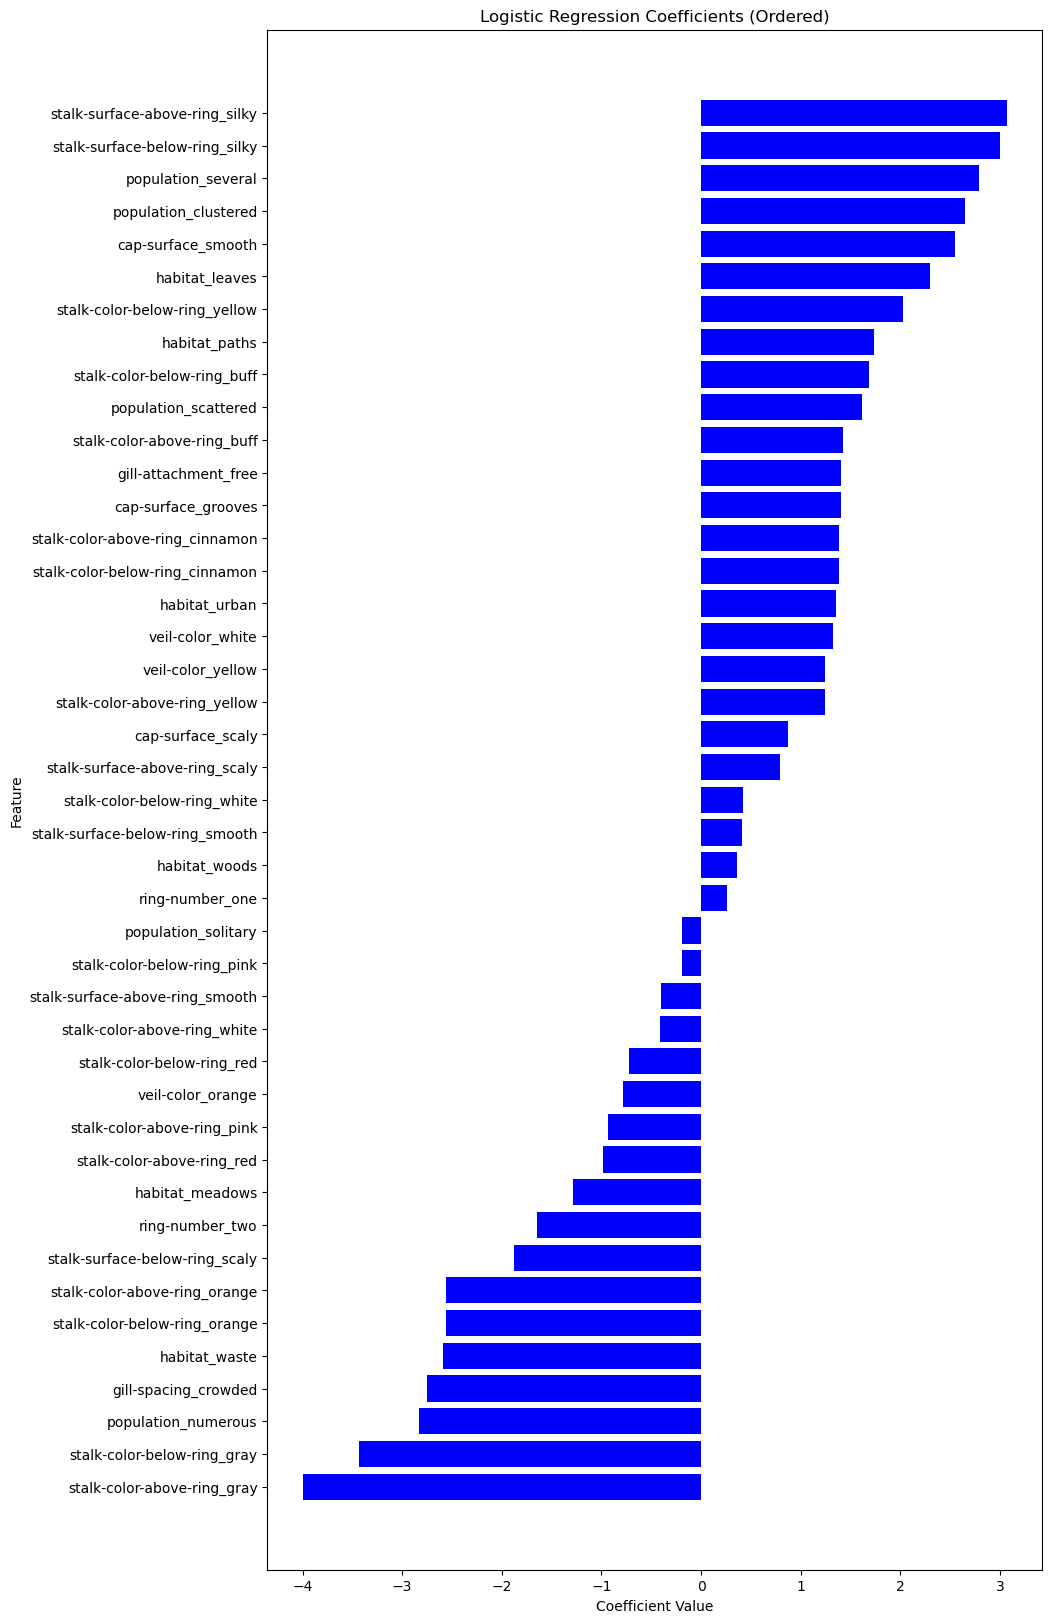

In [228]:
# Plot logistic regression coefficients ordered by size
import matplotlib.pyplot as plt
import numpy as np

coefficients = log_reg.coef_.flatten()
feature_names = X_train_linear.columns

sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients (Ordered)')
plt.show()

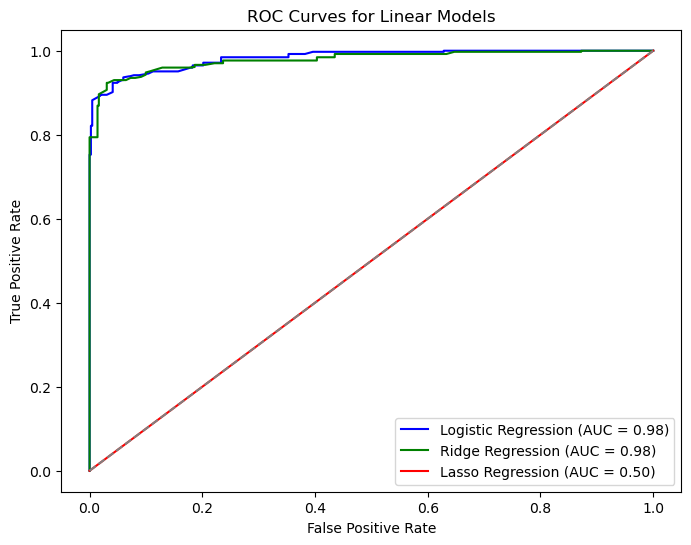

In [229]:
# Plot ROC curves and compute AUCs for each linear model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model_name, y_true, y_scores, color):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color=color)

plt.figure(figsize=(8, 6))
plot_roc_curve('Logistic Regression', y_test, log_reg.predict_proba(X_test_linear)[:, 1], 'blue')
plot_roc_curve('Ridge Regression', y_test, ridge.decision_function(X_test_linear), 'green')
plot_roc_curve('Lasso Regression', y_test, lasso.predict(X_test_linear), 'red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear Models')
plt.legend()
plt.show()

In [230]:
# Train non-linear models (SVC, Decision Tree, Random Forest, XGBoost, MLP)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

svc = SVC(probability=True)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
mlp = MLPClassifier(max_iter=1000)

svc.fit(X_train_nonlinear, y_train)
decision_tree.fit(X_train_nonlinear, y_train)
random_forest.fit(X_train_nonlinear, y_train)
xgboost.fit(X_train_nonlinear, y_train)
mlp.fit(X_train_nonlinear, y_train)

y_pred_svc = svc.predict(X_test_nonlinear)
y_pred_decision_tree = decision_tree.predict(X_test_nonlinear)
y_pred_random_forest = random_forest.predict(X_test_nonlinear)
y_pred_xgboost = xgboost.predict(X_test_nonlinear)
y_pred_mlp = mlp.predict(X_test_nonlinear)

def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model(y_test, y_pred_svc, 'Support Vector Classifier'))
results.append(evaluate_model(y_test, y_pred_decision_tree, 'Decision Tree'))
results.append(evaluate_model(y_test, y_pred_random_forest, 'Random Forest'))
results.append(evaluate_model(y_test, y_pred_xgboost, 'XGBoost'))
results.append(evaluate_model(y_test, y_pred_mlp, 'Multi-Layer Perceptron'))

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


/Users/justinalt/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:22:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                       Model  Accuracy  Precision    Recall  F1 Score
0  Support Vector Classifier     0.976        1.0  0.949482  0.974086
1              Decision Tree     0.976        1.0  0.949482  0.974086
2              Random Forest     0.976        1.0  0.949482  0.974086
3                    XGBoost     0.976        1.0  0.949482  0.974086
4     Multi-Layer Perceptron     0.976        1.0  0.949482  0.974086


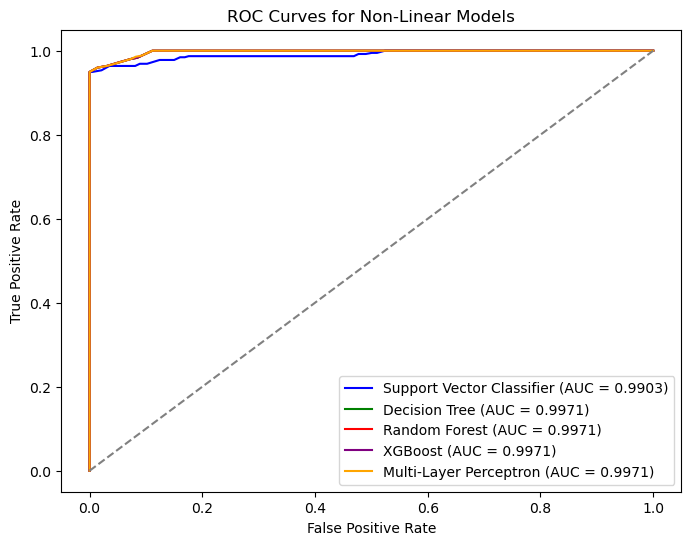

In [231]:
# Plot ROC curves and compute AUCs for non-linear models
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model_name, y_true, y_scores, color):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', color=color)

plt.figure(figsize=(8, 6))
plot_roc_curve('Support Vector Classifier', y_test, svc.predict_proba(X_test_nonlinear)[:, 1], 'blue')
plot_roc_curve('Decision Tree', y_test, decision_tree.predict_proba(X_test_nonlinear)[:, 1], 'green')
plot_roc_curve('Random Forest', y_test, random_forest.predict_proba(X_test_nonlinear)[:, 1], 'red')
plot_roc_curve('XGBoost', y_test, xgboost.predict_proba(X_test_nonlinear)[:, 1], 'purple')
plot_roc_curve('Multi-Layer Perceptron', y_test, mlp.predict_proba(X_test_nonlinear)[:, 1], 'orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Non-Linear Models')
plt.legend()
plt.show()

In [232]:
# Hyperparameter tuning for Lasso regression

param_grid = {'alpha': np.logspace(-4, 1, 10)}

grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_linear, y_train)

best_lasso = grid_search.best_estimator_
print(f'Best alpha: {grid_search.best_params_}')

y_pred_best_lasso = best_lasso.predict(X_test_linear).round().astype(int)

def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lasso_results = evaluate_model(y_test, y_pred_best_lasso, 'Lasso (Tuned)')
print(lasso_results)


Best alpha: {'alpha': 0.0001}
{'Model': 'Lasso (Tuned)', 'Accuracy': 0.9464615384615385, 'Precision': 0.9622132253711201, 'Recall': 0.9235751295336787, 'F1 Score': 0.9424983476536682}


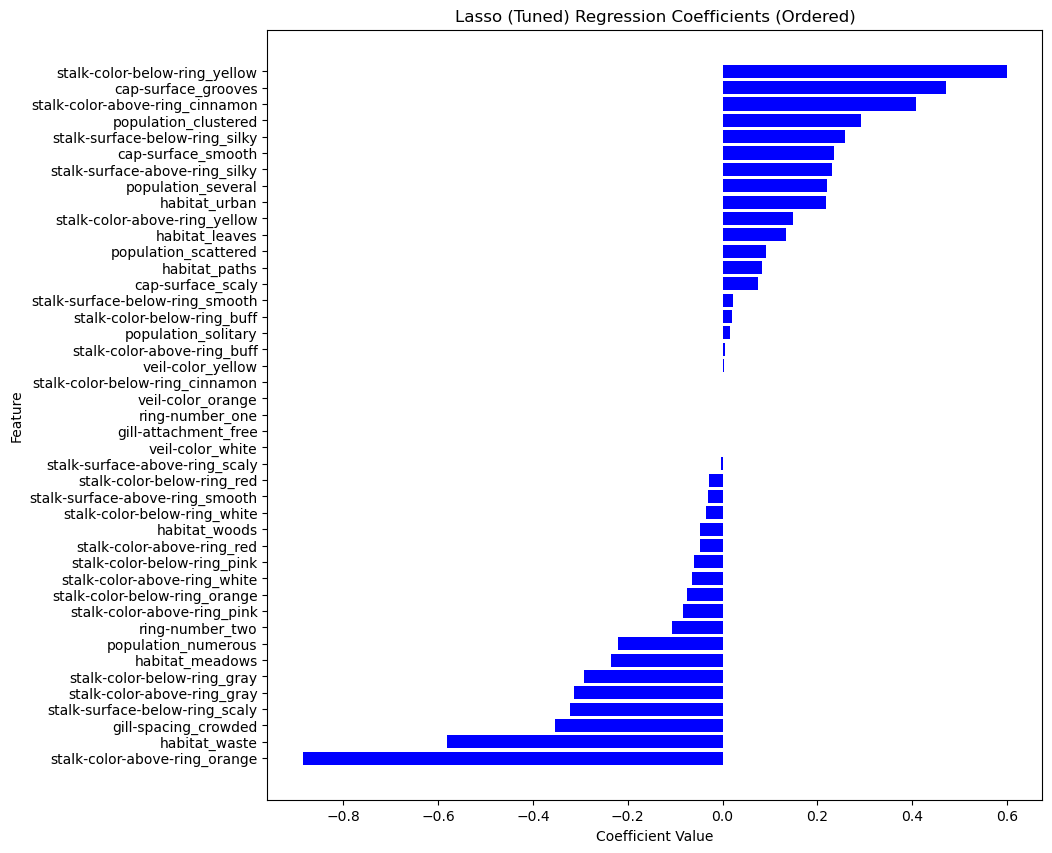

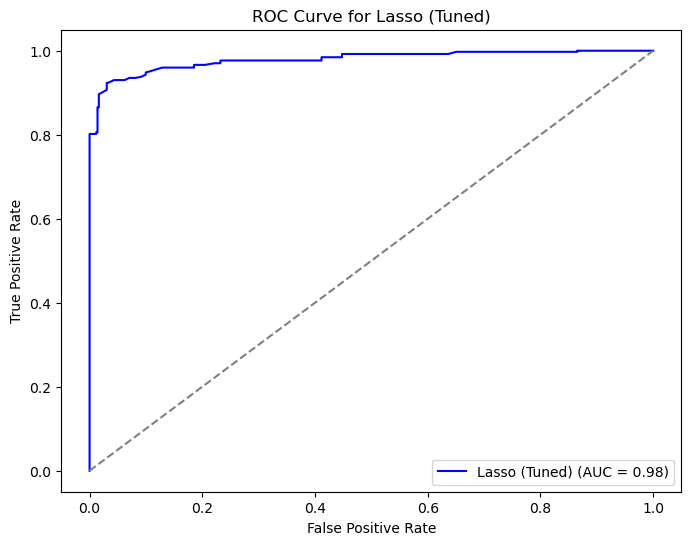

In [233]:
# Graph ROC and coefficients for best model

coefficients = best_lasso.coef_
feature_names = X_train_linear.columns

sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_features = feature_names[sorted_indices]

plt.figure(figsize=(10, 10))
plt.barh(sorted_features, sorted_coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso (Tuned) Regression Coefficients (Ordered)')
plt.show()

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, best_lasso.predict(X_test_linear))
auc = roc_auc_score(y_test, best_lasso.predict(X_test_linear))
plt.plot(fpr, tpr, label=f'Lasso (Tuned) (AUC = {auc:.2f})', color='blue')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Lasso (Tuned)')
plt.legend()
plt.show()